**Important Note for New Notebooks:** Each of these examples is designed to be self-contained.


---

**A. `DecisionTreeClassifier` Examples**

**Example 1 (Classifier): Iris Dataset - Basic Usage & Visualization**

This example demonstrates the basic use of `DecisionTreeClassifier` on the well-known Iris dataset and visualizes the resulting tree.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Iris Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names_iris = iris.feature_names
target_names_iris = iris.target_names

X_df_iris = pd.DataFrame(X, columns=feature_names_iris)
print("Iris Dataset Loaded for Decision Tree Classifier.")
print(f"Features shape: {X_df_iris.shape}, Target shape: {y.shape}")
print(f"Target names: {target_names_iris}")


Iris Dataset Loaded for Decision Tree Classifier.
Features shape: (150, 4), Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# --- 2. Split Data ---
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_df_iris, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining samples: {X_train_iris.shape[0]}, Test samples: {X_test_iris.shape[0]}")



Training samples: 105, Test samples: 45


In [4]:
# --- 3. Instantiate and Train Decision Tree Classifier (Default Parameters) ---
# Note: No explicit feature scaling is strictly necessary for basic decision trees,
# as they make decisions based on thresholds for individual features.
dt_clf_iris_default = DecisionTreeClassifier(random_state=42) # Using defaults
dt_clf_iris_default.fit(X_train_iris, y_train_iris)
print("\nDefault Decision Tree Classifier trained.")


Default Decision Tree Classifier trained.



--- Evaluation of Default Decision Tree Classifier (Iris) ---
Accuracy: 0.9333

Confusion Matrix:


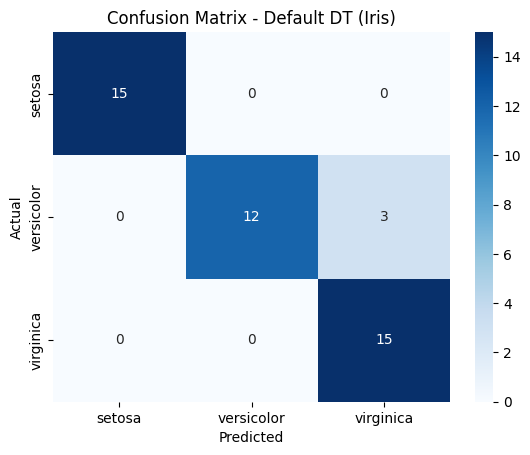


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [5]:
# --- 4. Make Predictions and Evaluate ---
y_pred_iris_default = dt_clf_iris_default.predict(X_test_iris)
accuracy_iris_default = accuracy_score(y_test_iris, y_pred_iris_default)

print("\n--- Evaluation of Default Decision Tree Classifier (Iris) ---")
print(f"Accuracy: {accuracy_iris_default:.4f}")

print("\nConfusion Matrix:")
cm_iris_default = confusion_matrix(y_test_iris, y_pred_iris_default)
sns.heatmap(cm_iris_default, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names_iris, yticklabels=target_names_iris)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Default DT (Iris)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris_default, target_names=target_names_iris))

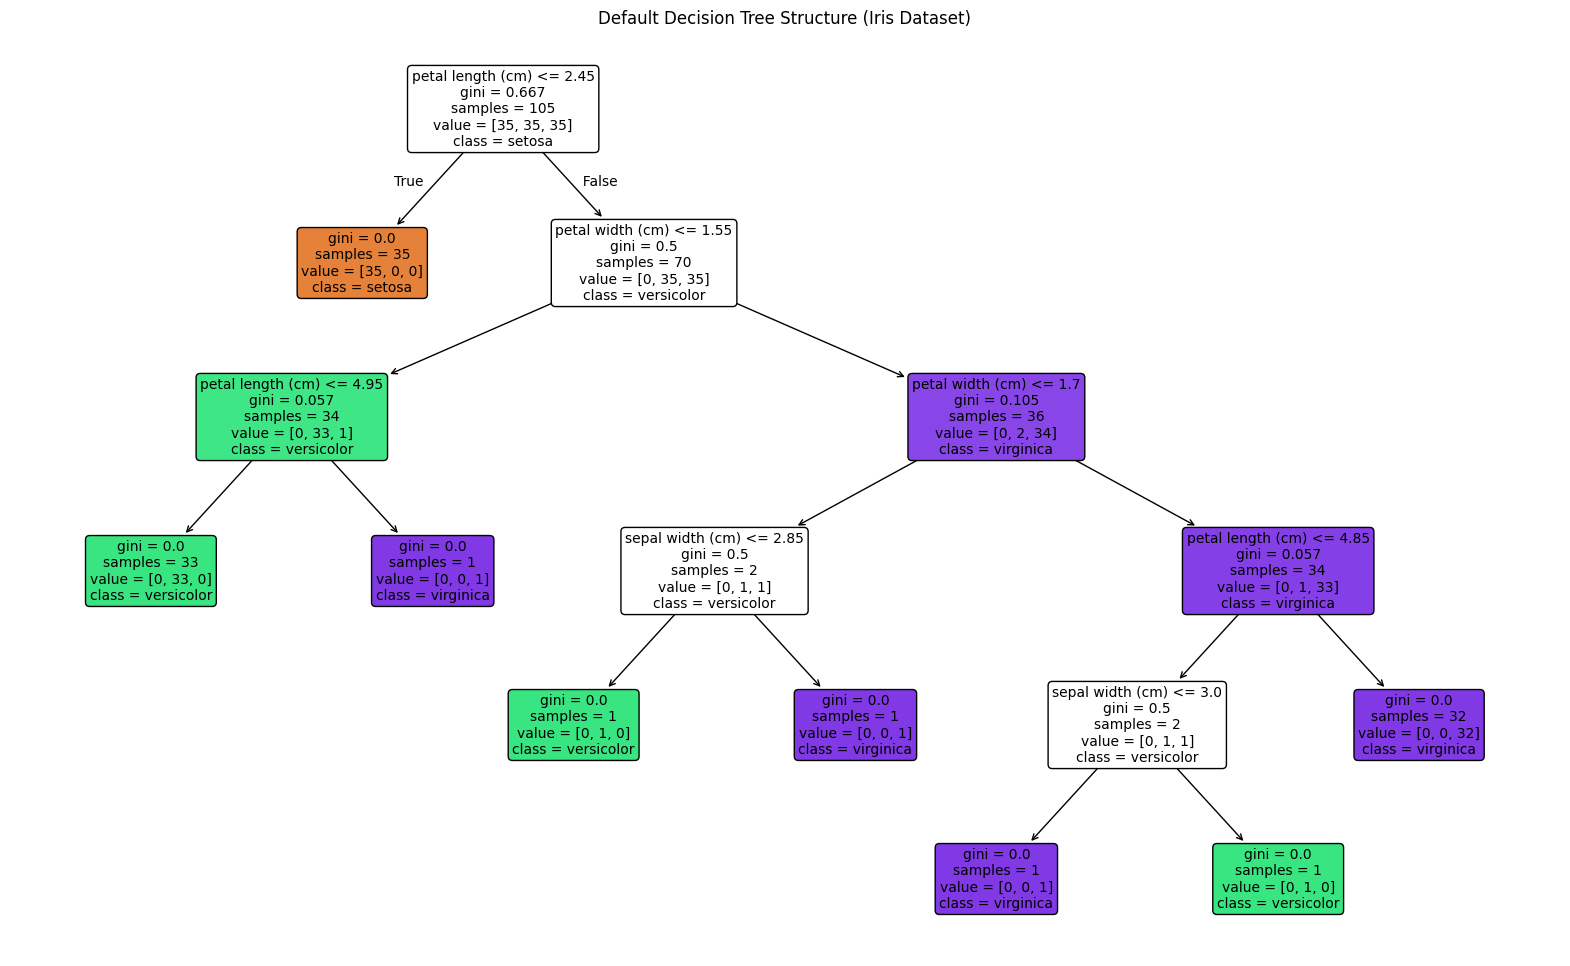

Depth of the default tree: 5


In [6]:
# --- 5. Visualize the Default Tree ---
plt.figure(figsize=(20,12)) # Adjust figure size for better readability
plot_tree(dt_clf_iris_default,
          filled=True, # Color nodes by majority class
          rounded=True, # Rounded corners for nodes
          class_names=target_names_iris,
          feature_names=feature_names_iris,
          fontsize=10)
plt.title("Default Decision Tree Structure (Iris Dataset)")
plt.show()
print(f"Depth of the default tree: {dt_clf_iris_default.get_depth()}")

**Discussion for Iris Classifier Example:**
* This basic example shows how quickly a decision tree can be trained and used.
* The visualized tree (`plot_tree`) clearly displays the decision rules (e.g., "petal length (cm) <= 2.45"), the Gini impurity at each node, the number of samples, and the majority class.
* You might notice the default tree can grow quite deep, potentially overfitting if the data were more complex or noisy.


---

**Example 2 (Classifier): Breast Cancer Dataset - Hyperparameter Tuning for Overfitting Control**

This example uses the Breast Cancer dataset and demonstrates how an unconstrained tree might overfit, then uses `GridSearchCV` to tune hyperparameters like `max_depth` and `min_samples_leaf` to create a more generalized model.


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [9]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
feature_names_cancer = cancer.feature_names
target_names_cancer = cancer.target_names

X_df_cancer = pd.DataFrame(X_cancer, columns=feature_names_cancer)
print("\nBreast Cancer Dataset Loaded for Decision Tree Classifier.")



Breast Cancer Dataset Loaded for Decision Tree Classifier.


In [10]:
# --- 2. Split Data ---
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_df_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

In [11]:
# --- 3. Demonstrate Potential Overfitting with a Default (Deep) Tree ---
dt_clf_cancer_deep = DecisionTreeClassifier(random_state=42)
dt_clf_cancer_deep.fit(X_train_cancer, y_train_cancer)

train_accuracy_deep = accuracy_score(y_train_cancer, dt_clf_cancer_deep.predict(X_train_cancer))
test_accuracy_deep = accuracy_score(y_test_cancer, dt_clf_cancer_deep.predict(X_test_cancer))
print("\n--- Default (Potentially Overfit) Decision Tree (Breast Cancer) ---")
print(f"Training Accuracy: {train_accuracy_deep:.4f}")
print(f"Test Accuracy: {test_accuracy_deep:.4f}")
print(f"Depth of the deep tree: {dt_clf_cancer_deep.get_depth()}")



--- Default (Potentially Overfit) Decision Tree (Breast Cancer) ---
Training Accuracy: 1.0000
Test Accuracy: 0.9181
Depth of the deep tree: 6


In [12]:
# --- 4. Hyperparameter Tuning with GridSearchCV ---
print("\n--- Hyperparameter Tuning with GridSearchCV (Breast Cancer) ---")
param_grid_dt = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_gscv_cancer = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
dt_gscv_cancer.fit(X_train_cancer, y_train_cancer)

best_params_cancer = dt_gscv_cancer.best_params_
print(f"Best parameters found: {best_params_cancer}")
print(f"Best cross-validated accuracy: {dt_gscv_cancer.best_score_:.4f}")


--- Hyperparameter Tuning with GridSearchCV (Breast Cancer) ---
Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validated accuracy: 0.9449


In [13]:
# --- 5. Train and Evaluate the Tuned Model ---
dt_clf_cancer_tuned = dt_gscv_cancer.best_estimator_ # Already fitted with best params on full train data

y_pred_cancer_tuned = dt_clf_cancer_tuned.predict(X_test_cancer)
train_accuracy_tuned = accuracy_score(y_train_cancer, dt_clf_cancer_tuned.predict(X_train_cancer))
test_accuracy_tuned = accuracy_score(y_test_cancer, y_pred_cancer_tuned)

print("\n--- Tuned Decision Tree Classifier (Breast Cancer) ---")
print(f"Training Accuracy: {train_accuracy_tuned:.4f}")
print(f"Test Accuracy: {test_accuracy_tuned:.4f}")
print(f"Depth of the tuned tree: {dt_clf_cancer_tuned.get_depth()}")

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test_cancer, y_pred_cancer_tuned, target_names=target_names_cancer))



--- Tuned Decision Tree Classifier (Breast Cancer) ---
Training Accuracy: 0.9799
Test Accuracy: 0.9240
Depth of the tuned tree: 3

Classification Report (Tuned Model):
              precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



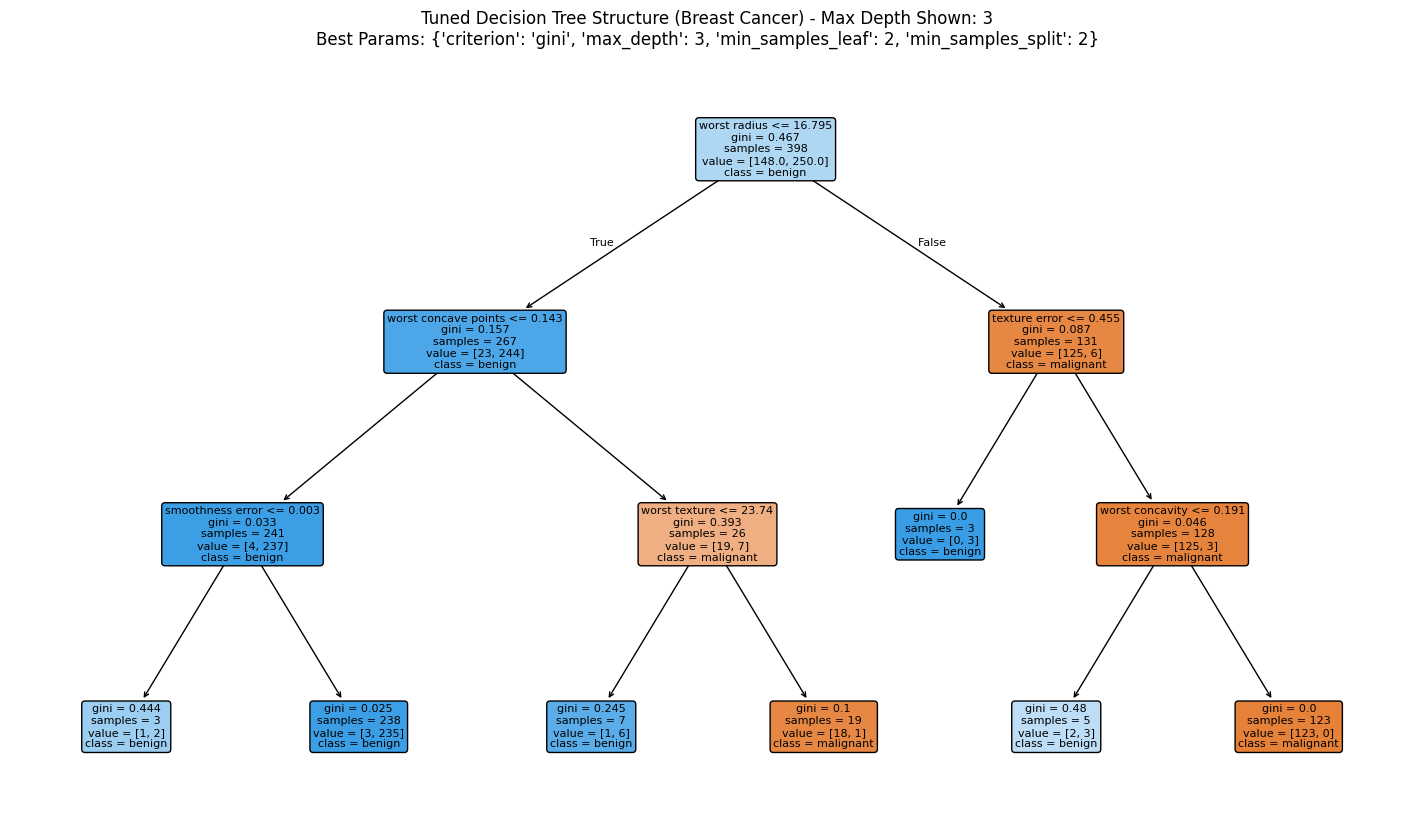

In [14]:
# --- 6. Visualize the Tuned Tree ---
plt.figure(figsize=(18,10)) # Adjust as needed
plot_tree(dt_clf_cancer_tuned,
          filled=True,
          rounded=True,
          class_names=target_names_cancer,
          feature_names=feature_names_cancer,
          fontsize=8,
          max_depth=3) # Visualize only top few levels if tree is still a bit deep
plt.title(f"Tuned Decision Tree Structure (Breast Cancer) - Max Depth Shown: 3\nBest Params: {best_params_cancer}")
plt.show()

**Discussion for Breast Cancer Classifier Example:**
* The initial deep tree might show higher training accuracy than test accuracy, indicating some overfitting.
* `GridSearchCV` helps find a combination of hyperparameters (like `max_depth`, `min_samples_split`, `min_samples_leaf`) that control the tree's complexity.
* The tuned tree often has a slightly lower training accuracy but potentially a better (or more robust) test accuracy, indicating improved generalization. Its depth will likely be smaller.
* Visualizing the tuned tree (even just the top few levels if it's still moderately deep) shows a simpler structure.

---

**B. `DecisionTreeRegressor` Examples**

**Example 1 (Regressor): Simple Synthetic 1D Non-Linear Data - Basic Usage & Visualization**

This example shows how `DecisionTreeRegressor` fits a step-function to approximate a non-linear relationship.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# --- 1. Generate Synthetic Non-Linear Data for Regression ---
np.random.seed(42)
n_samples_reg = 100
X_reg_synth = np.sort(5 * np.random.rand(n_samples_reg, 1), axis=0)
y_reg_synth = np.sin(X_reg_synth).ravel() + np.random.randn(n_samples_reg) * 0.1 # y = sin(x) + noise
# Add some more complex trend
y_reg_synth += (X_reg_synth.ravel() * 0.5)

print("\nSynthetic Regression Dataset Created for Decision Tree Regressor.")



Synthetic Regression Dataset Created for Decision Tree Regressor.


In [18]:
# --- 2. Split Data ---
X_train_reg_s, X_test_reg_s, y_train_reg_s, y_test_reg_s = train_test_split(
    X_reg_synth, y_reg_synth, test_size=0.3, random_state=42
)


In [19]:
# --- 3. Instantiate and Train Decision Tree Regressor (Default Parameters) ---
dt_reg_synth_default = DecisionTreeRegressor(random_state=42)
dt_reg_synth_default.fit(X_train_reg_s, y_train_reg_s)
print("\nDefault Decision Tree Regressor trained.")



Default Decision Tree Regressor trained.


In [20]:
# --- 4. Make Predictions and Evaluate ---
y_pred_reg_s_default = dt_reg_synth_default.predict(X_test_reg_s)
mse_reg_s_default = mean_squared_error(y_test_reg_s, y_pred_reg_s_default)
r2_reg_s_default = r2_score(y_test_reg_s, y_pred_reg_s_default)

print("\n--- Evaluation of Default Decision Tree Regressor (Synthetic Data) ---")
print(f"Mean Squared Error (MSE): {mse_reg_s_default:.4f}")
print(f"R-squared (R2): {r2_reg_s_default:.4f}")
print(f"Depth of the default regressor tree: {dt_reg_synth_default.get_depth()}")



--- Evaluation of Default Decision Tree Regressor (Synthetic Data) ---
Mean Squared Error (MSE): 0.0140
R-squared (R2): 0.9416
Depth of the default regressor tree: 10


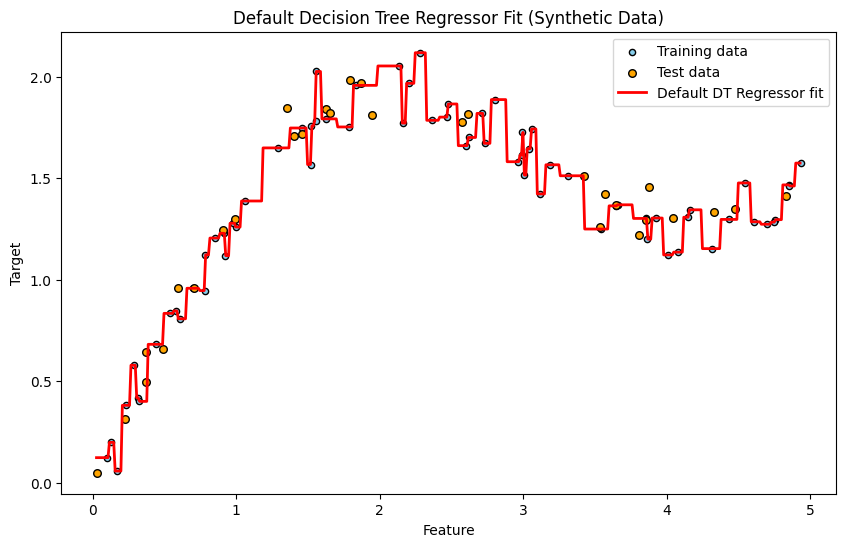

In [21]:
# --- 5. Visualize the Regression Fit ---
# Create points for plotting the regression line
X_plot_reg_s = np.arange(X_reg_synth.min(), X_reg_synth.max(), 0.01)[:, np.newaxis]
y_plot_reg_s_default = dt_reg_synth_default.predict(X_plot_reg_s)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_reg_s, y_train_reg_s, s=20, edgecolor="black", c="skyblue", label="Training data")
plt.scatter(X_test_reg_s, y_test_reg_s, s=30, edgecolor="black", c="orange", label="Test data")
plt.plot(X_plot_reg_s, y_plot_reg_s_default, color="red", label="Default DT Regressor fit", linewidth=2)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Default Decision Tree Regressor Fit (Synthetic Data)")
plt.legend()
plt.show()

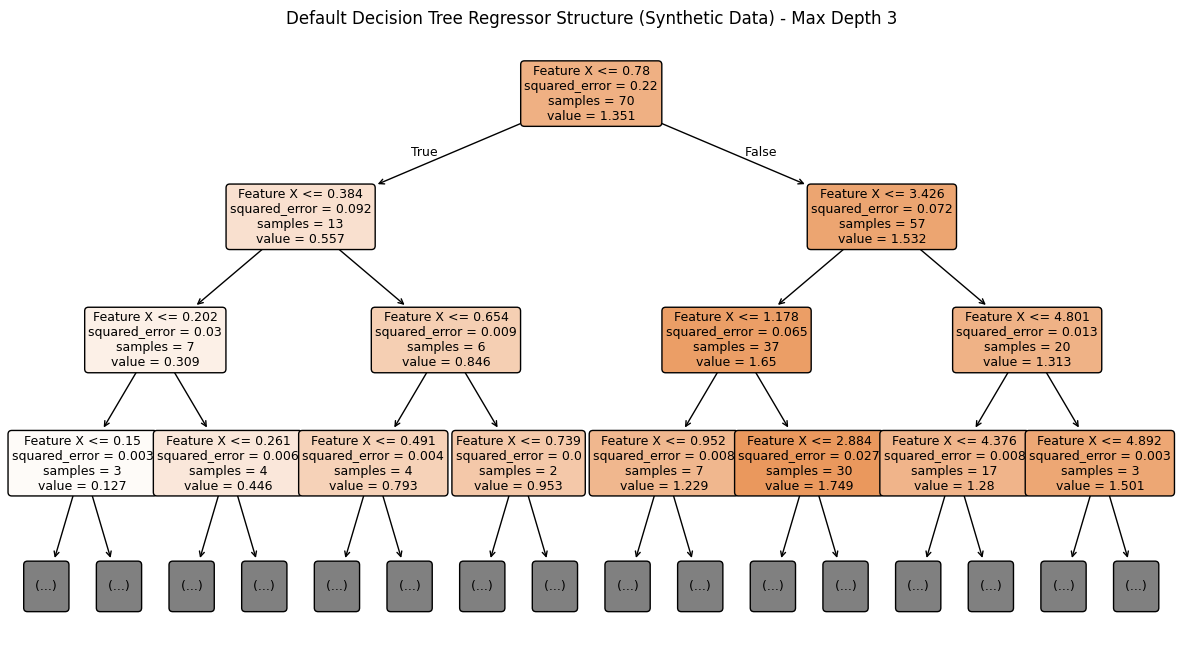

In [22]:
# --- 6. Visualize the Tree Structure ---
plt.figure(figsize=(15,8))
plot_tree(dt_reg_synth_default, filled=True, rounded=True, feature_names=["Feature X"], max_depth=3, fontsize=9)
plt.title("Default Decision Tree Regressor Structure (Synthetic Data) - Max Depth 3")
plt.show()


**Discussion for Synthetic Regressor Example:**
* The plot will show that the `DecisionTreeRegressor` prediction is a **step function**. It approximates the non-linear sine wave with a series of constant values within different regions (leaves) defined by the tree splits.
* The default tree might be quite deep and fit the training noise closely.

---


**Example 2 (Regressor): California Housing Dataset - Hyperparameter Tuning**

This example applies `DecisionTreeRegressor` to a real-world multi-feature dataset and uses `GridSearchCV` for tuning.


In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target
feature_names_housing = housing.feature_names

X_df_housing = pd.DataFrame(X_housing, columns=feature_names_housing)
print("\nCalifornia Housing Dataset Loaded for Decision Tree Regressor.")



California Housing Dataset Loaded for Decision Tree Regressor.


In [25]:
# --- 2. Split Data ---
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_df_housing, y_housing, test_size=0.3, random_state=42
)

In [26]:
# --- 3. Default (Potentially Overfit) Decision Tree Regressor ---
dt_reg_housing_default = DecisionTreeRegressor(random_state=42)
dt_reg_housing_default.fit(X_train_housing, y_train_housing)
y_pred_housing_default_train = dt_reg_housing_default.predict(X_train_housing)
y_pred_housing_default_test = dt_reg_housing_default.predict(X_test_housing)

mse_default_train = mean_squared_error(y_train_housing, y_pred_housing_default_train)
r2_default_train = r2_score(y_train_housing, y_pred_housing_default_train)
mse_default_test = mean_squared_error(y_test_housing, y_pred_housing_default_test)
r2_default_test = r2_score(y_test_housing, y_pred_housing_default_test)

print("\n--- Default Decision Tree Regressor (California Housing) ---")
print(f"Training MSE: {mse_default_train:.4f}, Training R2: {r2_default_train:.4f}")
print(f"Test MSE: {mse_default_test:.4f}, Test R2: {r2_default_test:.4f}")
print(f"Depth of default tree: {dt_reg_housing_default.get_depth()}")



--- Default Decision Tree Regressor (California Housing) ---
Training MSE: 0.0000, Training R2: 1.0000
Test MSE: 0.5280, Test R2: 0.5977
Depth of default tree: 34


In [27]:
# --- 4. Hyperparameter Tuning with GridSearchCV ---
print("\n--- Hyperparameter Tuning for Decision Tree Regressor (California Housing) ---")
param_grid_dt_reg = {
    'max_depth': [None, 5, 10, 15], # None means nodes are expanded until all leaves are pure or contain less than min_samples_split
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    # 'ccp_alpha': [0.0, 0.001, 0.01] # Cost-complexity pruning, can be added
}

dt_gscv_housing = GridSearchCV(DecisionTreeRegressor(random_state=42),
                               param_grid_dt_reg, cv=5, scoring='r2', n_jobs=-1, verbose=1)
dt_gscv_housing.fit(X_train_housing, y_train_housing)

best_params_housing_reg = dt_gscv_housing.best_params_
print(f"Best parameters found: {best_params_housing_reg}")
print(f"Best cross-validated R2 score: {dt_gscv_housing.best_score_:.4f}")


--- Hyperparameter Tuning for Decision Tree Regressor (California Housing) ---
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 50}
Best cross-validated R2 score: 0.7108


In [28]:
# --- 5. Train and Evaluate the Tuned Model ---
dt_reg_housing_tuned = dt_gscv_housing.best_estimator_

y_pred_housing_tuned_train = dt_reg_housing_tuned.predict(X_train_housing)
y_pred_housing_tuned_test = dt_reg_housing_tuned.predict(X_test_housing)

mse_tuned_train = mean_squared_error(y_train_housing, y_pred_housing_tuned_train)
r2_tuned_train = r2_score(y_train_housing, y_pred_housing_tuned_train)
mse_tuned_test = mean_squared_error(y_test_housing, y_pred_housing_tuned_test)
r2_tuned_test = r2_score(y_test_housing, y_pred_housing_tuned_test)

print("\n--- Tuned Decision Tree Regressor (California Housing) ---")
print(f"Training MSE: {mse_tuned_train:.4f}, Training R2: {r2_tuned_train:.4f}")
print(f"Test MSE: {mse_tuned_test:.4f}, Test R2: {r2_tuned_test:.4f}")
print(f"Depth of tuned tree: {dt_reg_housing_tuned.get_depth()}")



--- Tuned Decision Tree Regressor (California Housing) ---
Training MSE: 0.2492, Training R2: 0.8140
Test MSE: 0.3681, Test R2: 0.7195
Depth of tuned tree: 17


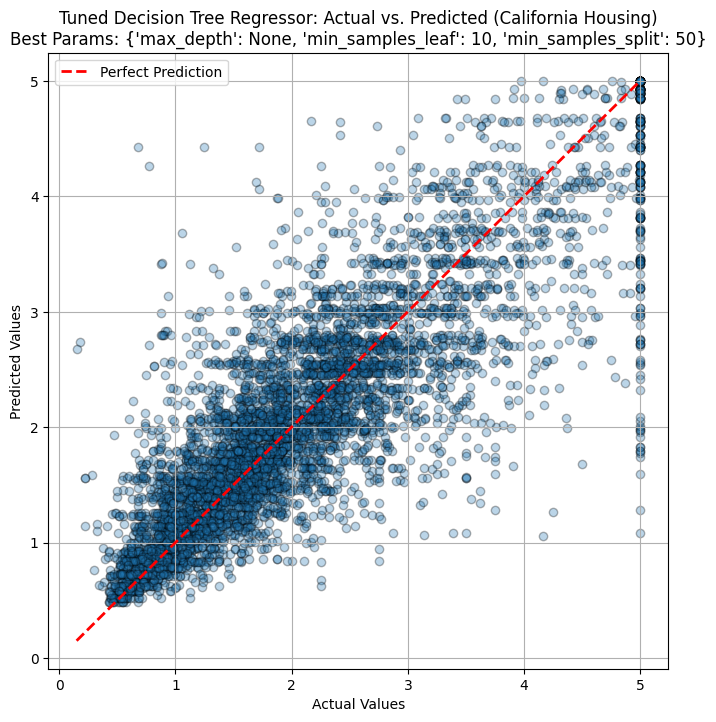

In [29]:
# --- 6. Plot Actual vs. Predicted for the tuned model ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test_housing, y_pred_housing_tuned_test, alpha=0.3, edgecolors='k')
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Tuned Decision Tree Regressor: Actual vs. Predicted (California Housing)\nBest Params: {best_params_housing_reg}")
plt.legend()
plt.grid(True)
plt.show()

**Discussion for California Housing Regressor Example:**
* This example shows `DecisionTreeRegressor` on a more complex, real-world dataset.
* The default, unconstrained tree is likely to overfit badly (high training R2, much lower test R2).
* `GridSearchCV` helps find hyperparameters that control the tree's complexity (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`).
* The tuned regressor should exhibit better generalization (a test R2 closer to its training R2, and hopefully higher than the default tree's test R2).
* Visualizing the tree structure itself for the California housing data might be too complex due to the number of features and potential depth, so plotting actual vs. predicted values is a more practical way to assess its regression performance visually.

These four examples should provide a solid understanding of how to implement and tune decision trees for both classification and regression tasks using Scikit-learn.
